In [22]:
import pandas as pd
import matplotlib.pyplot as plt


## Interactions info

In [57]:
interactions = pd.read_csv("../data/raw/u.data", sep="\t", header=None)
interactions.columns = ["user", "item", "rating", "timestamp"]

interactions.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [58]:
interactions["rating"].unique()

array([3, 1, 2, 4, 5])

There are only five rating values. Lets see how they are distributed.

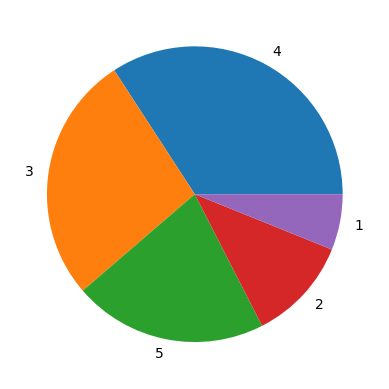

In [59]:
counts = interactions["rating"].value_counts() 

plt.pie(counts, labels=counts.index)
plt.show()

Lets see user average number of rated films

In [62]:
rated_films_num = interactions["user"].value_counts()

rated_films_num.describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: count, dtype: float64

In [63]:
rated_users_num = interactions["item"].value_counts()

rated_users_num.describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: count, dtype: float64

Lets see film average number of users who rated it

## User info

In [28]:
users = pd.read_csv("../data/raw/u.user", sep="|", header=None)
users.columns = ["id", "age", "gender", "occupation", "zip_code"]

users.head()

,id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Movie info

In [30]:
genres = pd.read_csv("../data/raw/u.genre", sep="|", header=None)
genres.columns = ["name", "id"]

genres

,name,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [41]:
items = pd.read_csv("../data/raw/u.item", sep="|", header=None, encoding="latin-1")
items.columns = ["id", "title", "release_date", "video_release_date", "IMDB_URL"] + genres["name"].values.tolist()

items.head()

,id,title,release_date,video_release_date,IMDB_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
items["video_release_date"].isna().all()  # video release date can be dropped

True

Lets see film generes distribution

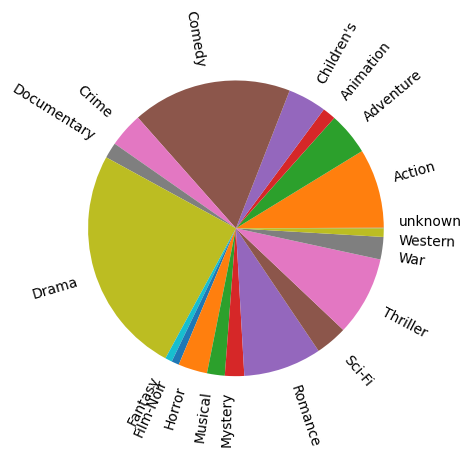

In [55]:
genre_counts = items[genres["name"]].sum()

plt.pie(genre_counts, labels=genre_counts.index, rotatelabels=True)
plt.show()

## Conclusion

Though there is plenty of information about users and films, there is also enough information about user-film interactions. I am going to transform rating data into a matrix of size (*num_users* X *num_items*), where rows correspond to users and cloumns correspond to items, and the values on the intersection of some row (user) and column (item) will be equal to user rating on that item (0 if the user did not interact with the item). From that point, I can use Alternating Least Squares (ALS) to factorize this matrix and get embeddings for users and items.